# ___pyOpTools_ Tutorial

In [139]:
from pyoptools.all import *
from math import *

## 0. Display 3D

In order to visualize the optical systems and the raytracings the class Plot3D is used as follows:
```python
    Plot3D(Obj,center=(x,y,z),size=(a,b),rot=[(rx,ry,rz)],scale=s)
```

where: 

 $\quad$  Obj is the name of the optical element or system to be plotted
   
 $\quad$  (x,y,z) are the cartesian coordiantes of its center*
   
 $\quad$  (a,b) are the horizontal and vertical dimensions of the image
   
 $\quad$  (rx,ry,rz) are the rotation angles in radians around the axis x,y & z
   
 $\quad$ s is the scale of the image in the notebook.

*The y axis is pointing downwards and the z axis is pointing towards the screen.

$a^2$

## 1. Optical surfaces

Shape, reflectivity


### 1.1 Plane surfaces

In [141]:
P1=Plane(shape=Circular(radius=(25)))
P2=Plane(shape=Rectangular(size=(10,10)))
P3=Plane(shape=Triangular(coord=((-30,0),(0,0),(-20,-30))))
P=IdealSurface()

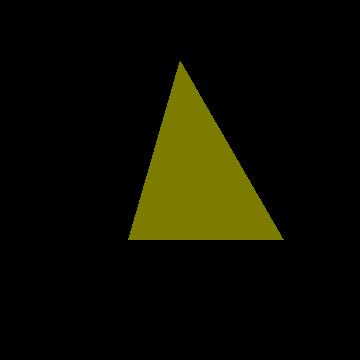

In [142]:
Plot3D(P3,center=(-20,-10,0),size=(60,60),rot=[(0,-pi/6,0)],scale=6)
#Plot3D(P1,center=(0,0,0),size=(60,60),rot=[(0,0,0)],scale=6)

## 1.2 Spherical surfaces
Curvature, radius of curvature 

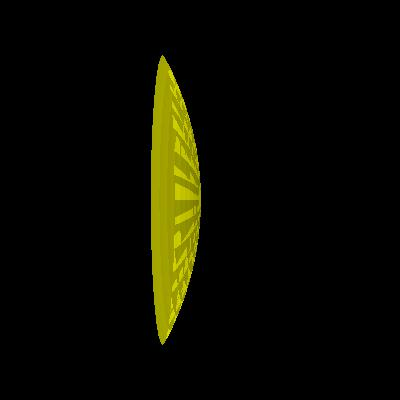

In [143]:
S=Spherical(curvature=1/300., shape=Circular(radius=145.),reflectivity=1)
Plot3D(S,center=(0,0,0),size=(400,400),rot=[(0,-pi/1.9,0)],scale=1)

### 1.3 Cylinders and cylidrical surfaces

Cylinders and Portions of circular cylinders with different shapes and curvatures

In [144]:
S1=Cylinder(radius=36,length=100,reflectivity=1)
S2=Cylindrical(shape=Circular(radius=(50)),curvature=1/100.)
S3=Cylindrical(shape=Rectangular(size=(50,100)),curvature=1/20.)

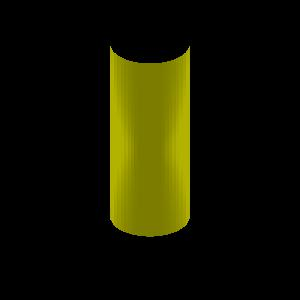

In [314]:
Plot3D(S3,center=(0,0,0),size=(150,150),rot=[(pi/6,0,0)],scale=2)

### 1.4 Aspheric surfaces 

Shperical aberration;
Idea:  Comparation of the spherical aberration

In [121]:
%%latex
$$Z=\frac{(A_x x^2+A_y y^2)}{(1+\sqrt{(1-(1+K_x)A_x^2 x^2-(1+K_y) A_y^2 y^2))}}+ poly2d()$$

<IPython.core.display.Latex object>

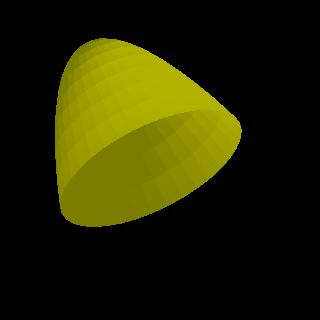

In [146]:
sa=Aspherical(shape=Circular(radius=2.5),Ax=.2,Ay=.2,Kx=.1, Ky=.15, poly=poly2d((0,0,0,.5,0,.5)))
Plot3D(sa,center=(-2,-2,5),size=(8,8),rot=[(-3*pi/10,pi/4,0)],scale=40)

# 2. From Optical surfaces to Optical components

By linking properly some optical surfaces it is possible to build several optical components using the *pyOpTools* class *Component* as follows:
```python
 P = Component(surflist=[(S1,(x1,y1,z1),(rx1,ry1,rz1)),
                         (S2,(x2,y2,z2),(rx2,ry2,rz2)),
                         (S3,(x3,y3,z3),(rx3,ry3,rz3))],material=n)            
```
    
where 

$
    \quad S_i$ is the name of the i-th optical surface
    
$
    \quad(x_i,y_i,z_i)$ are the cartesian coordinates of its center
    
$
    \quad(rx_i,ry_i,rz_i)$ are the rotation angles in radians around the axis x,y & z


   $\quad$ n  is the refraction index of the optical component.
   
Aditionnally pyOpTools includes a wide catalogue of refractive indexes from several lens facricants, among them:
- sumita,
- ohara
- hoya
- corning
- hoya
- schott

To access the value of the refractive index: 

```python
    n=material.fabricant['ManofacturerTM']
```

To display all the Manofacturer's TradeMarks of the lenses availables 

```python
    material.fabricant.keys()
```



Component example

Predifined components

In [147]:
# Example of an optical component Prisme 90°

width=50
height=50
reflectivity=0.5
        
a_face= Plane(shape=Rectangular(size=(width,height)))
b_face= Plane(shape=Rectangular(size=(width,height)))


h=sqrt(2.)*width
h_face= Plane (shape=Rectangular(size=(h,height)),reflectivity=reflectivity)
        
w2=width/2.

e1=Plane (shape=Triangular(((-w2,w2),(-w2,-w2),(w2,-w2))))
e2=Plane (shape=Triangular(((-w2,w2),(-w2,-w2),(w2,-w2))))

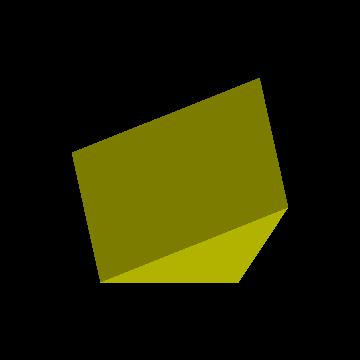

In [150]:
P=Component(surflist=[(a_face,(0,0,-width/2),(0,0,0)),
                      (b_face,(width/2,0,0),(0,pi/2,0)),
                      (h_face,(0,0,0),(0,-pi/4,0)),
                      (e1,(0,height/2,0),(pi/2,-pi/2,0)),
                      (e2,(0,height/2,0),(pi/2,-pi/2,0))
                      ],material=material.schott["BK7"])
Plot3D(P,size=(120,120),scale=3,rot=[(pi/6,pi/8,0)])

pyOptools includes **predefined optical components**

## 2.1 Lens

SphericalLens IdealLens, IdealTLens Comparision doublets and airspaced doublets

```python
    L1=SphericalLens(radius=r,curvature_s1=c1,curvature_s2=c2,thickness=d,material=n)
    
    L2=IdealLens(shape=Circular(radius=(r)),f=l)
    
    L=IdealLens(shape=Circular(radius=(25)), f=100)
```

> Puede haber problemas con la visualizacion  IdealTLenses





In [295]:
L1=SphericalLens(radius=25,curvature_s1=1/100.,curvature_s2=-1/100.,thickness=8,material=material.ohara['O_PBL2'])
#L=IdealTLens(shape=Circular(radius=(25)), f=100, d=10)

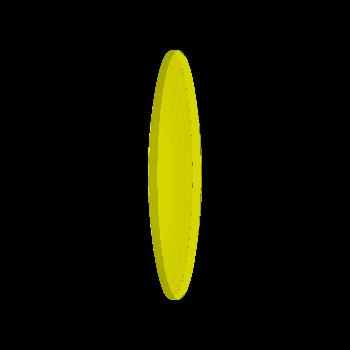

In [304]:
Plot3D(L1,center=(0,0,0),size=(70,70),rot=[(0,pi/1.8,0)],scale=5)

## 2.2 Mirrors, stops & sensors

```pytho
m=RoundMirror(radius= 50., thickness=1, reflectivity = 0.5)
m2=RectMirror(size=(40,25,10), reflectivity = 0.5)
```


   Other kinds of mirrors by adjusting the shape size and reflectivity

```python
    AP=Stop(shape=Rectangular(size=(50,50)),ap_shape=Circular(radius=25))

    c=CCD()
```
    
    

In appeareance they look like simple surfaces but when interacnting with rays they have different propperties.
    

## 2.3 Optical prismes & beamsplitters

P0=RightAnglePrism(width=50,height=50,material=material.schott["BK7"],reflectivity=0)

bs=BeamSplitingCube(size=50,material=N_BK7,reflectivity=0.5)


CCD
RightAnglePrism, PentaPrism
Block, BeamSplitingCube
Stops


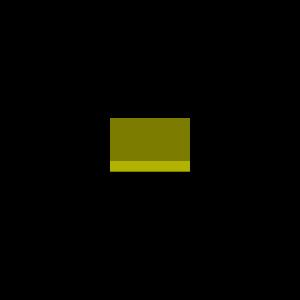

In [322]:
m=RoundMirror(radius= 50., thickness=1, reflectivity = 0.5)
m2=RectMirror(size=(40,25,10), reflectivity = 0.5)

Plot3D(m2,center=(0,0,0),size=(150,150),rot=[(pi/6,0,0)],scale=2)

# Rays & Optical systems